# Project Life Expectancy and GDP


## Introduction
This project will investigate if there is a strong correlation between the economic output of a country and the life expectancy of its citizens at birth. There are totally six countries in this dataset, which are Chile, China, Germany, Mexico, United States of America and Zimbabwe. 


## Goals
The goals are to prepare data, followed by analysis with plots, and seek to explain the findings from the study.

Below are some topics to explore :
- What is the distribution of that life expectancy?
- What is the average life expectancy in these nations?
- Has life expectancy increased over time in the six nations?

- What is the distribution of the GDP?
- What is the average GDP in these nations?
- Has GDP increased over time in the six nations?

- Is there a correlation between GDP and life expectancy of a country?

## Data sources

- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)


## Data at first glance

With Pandas funciton: `head()`, `info()`, `describe()` and `Sereies.value_counts()`, the info below are what can be expeced:

There are totally `4 columns` in the dataset. All of them have `96 rows` with non-null values.
   - Categorical variable
       - `Country` - There are 6 unique values(countries), which are Chile, China, Germany, Mexico, United States of America and Zimbabwe.
   - Numerical variables
       - `Year` - The year for the observation, which ranges from 2000 to 2015.
       - `Life expectancy at birth (years)` - The average life expectancy is around 72.79 years old. The median is about 76.75 years old.
       - `GDP` - Gross Domestic Product in U.S. dollars. The average GDP is around 3.88 trillion dollars, and the median is about 1.28 trillion dollars. Because the difference between the mean and median is large, there could be outliers in the GDP column.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data
df = pd.read_csv('all_data.csv')

# Rename the column names and make them into lowercase 
df = df.rename(columns = {'Life expectancy at birth (years)': 'life_expt'})
df.columns = map(str.lower, df.columns)

# Replace 'United States of America' with 'USA'
df.country = df.country.str.replace('United States of America', 'USA')

# Use drop_duplicates() function to make sure there are no duplicate rows 
df.drop_duplicates()

# shape function presents a tuple of (number of rows, nunber of columns) 
print(df.shape)

df.head()
#1e+10 in Python number means 1 followed by 10 zeros

(96, 4)


,country,year,life_expt,gdp
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    96 non-null     object 
 1   year       96 non-null     int64  
 2   life_expt  96 non-null     float64
 3   gdp        96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [4]:
df.describe(include='all')

,country,year,life_expt,gdp
count,96,96.000000,96.000000,9.600000e+01
unique,6,NaN,NaN,NaN
top,Chile,NaN,NaN,NaN
freq,16,NaN,NaN,NaN
mean,NaN,2007.500000,72.789583,3.880499e+12
std,NaN,4.633971,10.672882,5.197561e+12
min,NaN,2000.000000,44.300000,4.415703e+09
25%,NaN,2003.750000,74.475000,1.733018e+11
50%,NaN,2007.500000,76.750000,1.280220e+12
75%,NaN,2011.250000,78.900000,4.067510e+12


In [5]:
df.country.value_counts()

Chile       16
China       16
Germany     16
Mexico      16
USA         16
Zimbabwe    16
Name: country, dtype: int64

## Plot and Analysis

### A-1. What is the distribution of the life expectancy? And what is the average life expectancy in these nations?

By plotting the columns of `Life expectancy at birth (life_expt)` v.s. `Country (country)`, with `histogram`(upper plot), we can see the distribution of the life expectancy is `left skewed` because of the data from `Zimbabwe`. Thus, the overall mean life expectancy `72.79` years old is slightly lower than the median which is `76.75` years old.

Moreover, with `Barplot`(lower-left plot) and `Boxplot`(lower-right plot) showing life expectancy for EACH COUNTRY in descending order, it's much more clear that most of the countries have the average life expectancy from `74 to 80 years old`. However, the average life expectancy for Zimbabwe is only around `50 years old`. Another finding via the boxplot is that the range of life expectancy from Zimbabwe is much larger than others.

The average life expectancy for each country are as follow (Years):
- Germany     79.66
- Chile       78.94
- USA         78.06
- Mexico      75.72
- China       74.26
- Zimbabwe    50.09

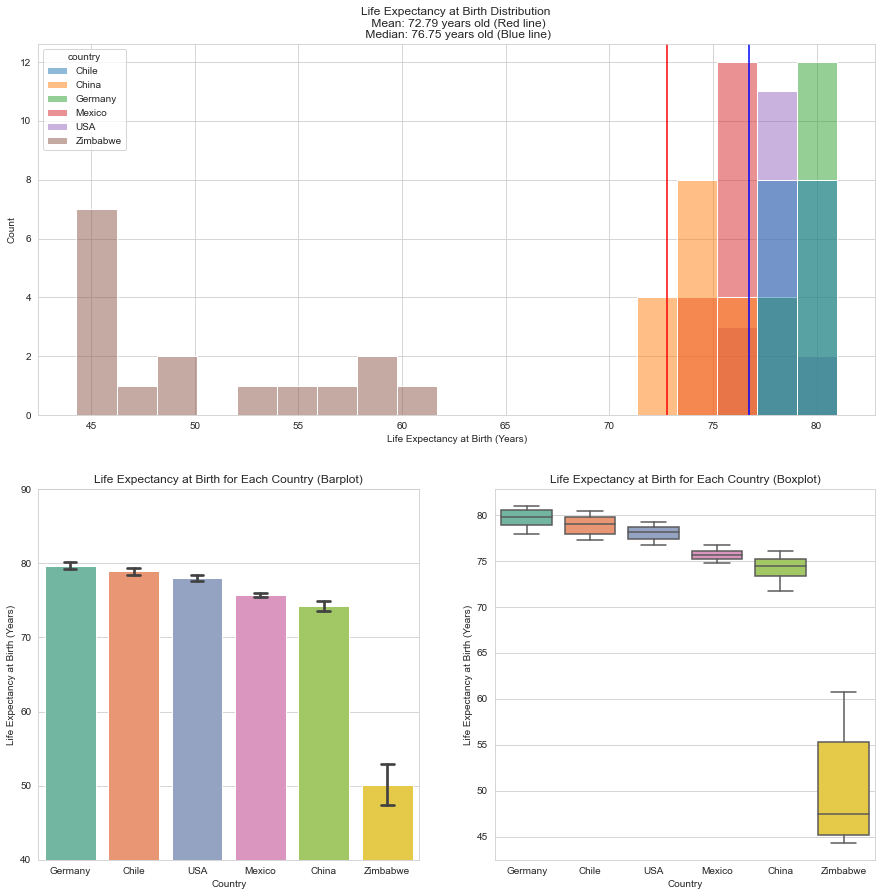

country
Germany     79.66
Chile       78.94
USA         78.06
Mexico      75.72
China       74.26
Zimbabwe    50.09
Name: life_expt, dtype: float64

<Figure size 432x288 with 0 Axes>

In [5]:
plt.figure(figsize=(15, 15))
sns.set_style('whitegrid')

# Histogram
ax1 = plt.subplot(2, 1, 1)
sns.histplot(data = df, x = 'life_expt', hue = 'country')
mean = round(df['life_expt'].mean(), 2)
median = round(df['life_expt'].median(), 2)
plt.axvline(mean, color='red')
plt.axvline(median, color='blue')
plt.title(f'Life Expectancy at Birth Distribution \n Mean: {mean} years old (Red line)\n Median: {median} years old (Blue line)')
plt.xlabel('Life Expectancy at Birth (Years)')
plt.ylabel('Count')

# Sort Life Expectancy column in descending order 
ordered_life = df.sort_values(['life_expt'], ascending = False)

# Barplot
ax2 = plt.subplot(2, 2, 3)
sns.barplot(data = ordered_life, x = 'country',  y = 'life_expt', palette = 'Set2', capsize = .2)
ax2.set_ylim(40, 90)
plt.title('Life Expectancy at Birth for Each Country (Barplot)')
plt.xlabel('Country')
plt.ylabel('Life Expectancy at Birth (Years)')

# Boxplot
ax3 = plt.subplot(2, 2, 4)
sns.boxplot(data = ordered_life,  y= 'life_expt', x = 'country', palette = 'Set2')
plt.title('Life Expectancy at Birth for Each Country (Boxplot)')
plt.xlabel('Country')
plt.ylabel('Life Expectancy at Birth (Years)')

plt.show()
plt.clf()

mean_life_expt = round(df.groupby('country').life_expt.mean().sort_values(ascending = False), 2)
mean_life_expt

### A-2. Has life expectancy increased over time in the six nations?

By plotting the columns of `Life expectancy at birth (life_expt)` v.s. `Year(year)` with `line plot`, we can see the trend of the life expectancy from 2000 to 2015 in the six nations were all `increasing`. Especially for Zimbabwe, even though there was a dip around year 2004, the slope turned higher than other countries around year 2005.

However, if we look closer and break out the graph by country, in the plot below, Chile and Mexico both experienced an obvious dip around year 2008. As both Chile and Mexico are situated in the same continent, whether there might be some correlation needs to be looked into further. 

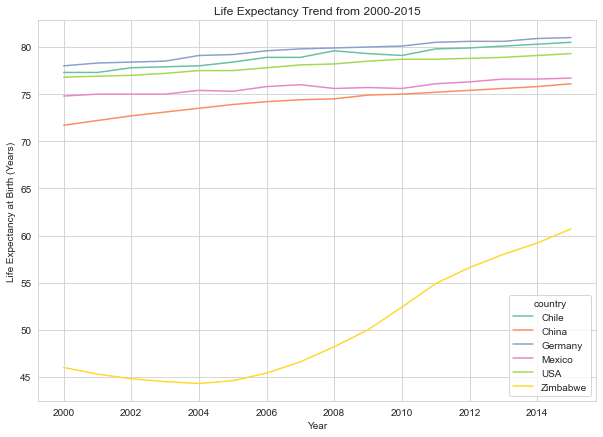

<Figure size 432x288 with 0 Axes>

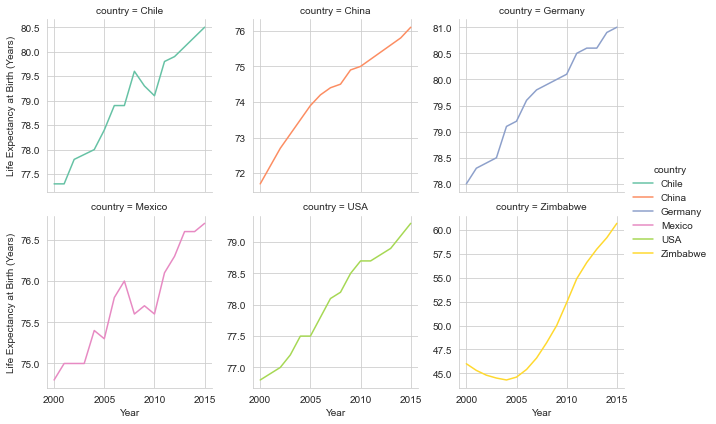

In [7]:
plt.figure(figsize=(10,7))
sns.set_style('whitegrid')

sns.lineplot(data = df, x = 'year', y = 'life_expt', hue = 'country', palette = 'Set2')
plt.title('Life Expectancy Trend from 2000-2015')
plt.xlabel('Year')
plt.ylabel('Life Expectancy at Birth (Years)')
plt.show()
plt.clf()

graph_life = sns.FacetGrid(df, col = 'country', col_wrap = 3,
                           sharey = False,
                           hue = 'country', palette = 'Set2')
graph_life = (graph_life.map(sns.lineplot, 'year', 'life_expt')
             .set_axis_labels('Year', 'Life Expectancy at Birth (Years)')
             .add_legend())

graph_life

### B-1. What is the distribution of the GDP? And what is the average GDP in these nations?

By plotting the columns of `GDP (gdp)` v.s. `Country (country)`, with `histogram`(upper plot), we can see the distribution of the GDP is exteremely `right skewed` because of the data from `USA` and partly `China`. Thus, the overall mean GDP 3,880,498,570,768 US dollars is `three times` more than the median, which is 1,280,220,000,000 US dollars.

Moreover, with `Barplot`(lower-left plot) and `Boxplot`(lower-right plot) showing GDP for EACH COUNTRY in descending order, not like what we see in the graph of Life Expectancy, `the average GDP for each country varies A LOT`. Especially with the boxplot, we can find that the range of GDP for China and USA were much larger than other countries, which indicates that there was significant CHANGE from 2000 to 2015. We can look into further with the line plot at B-2 section.

The average GDP for each country are as follow (US dollars):

- `USA`         14,075,000,000,000
- `China`       4,957,714,000,000
- `Germany`     3,094,776,000,000
- `Mexico`      976,650,600,000
- `Chile`       169,788,800,000
- `Zimbabwe`    9,062,580,000

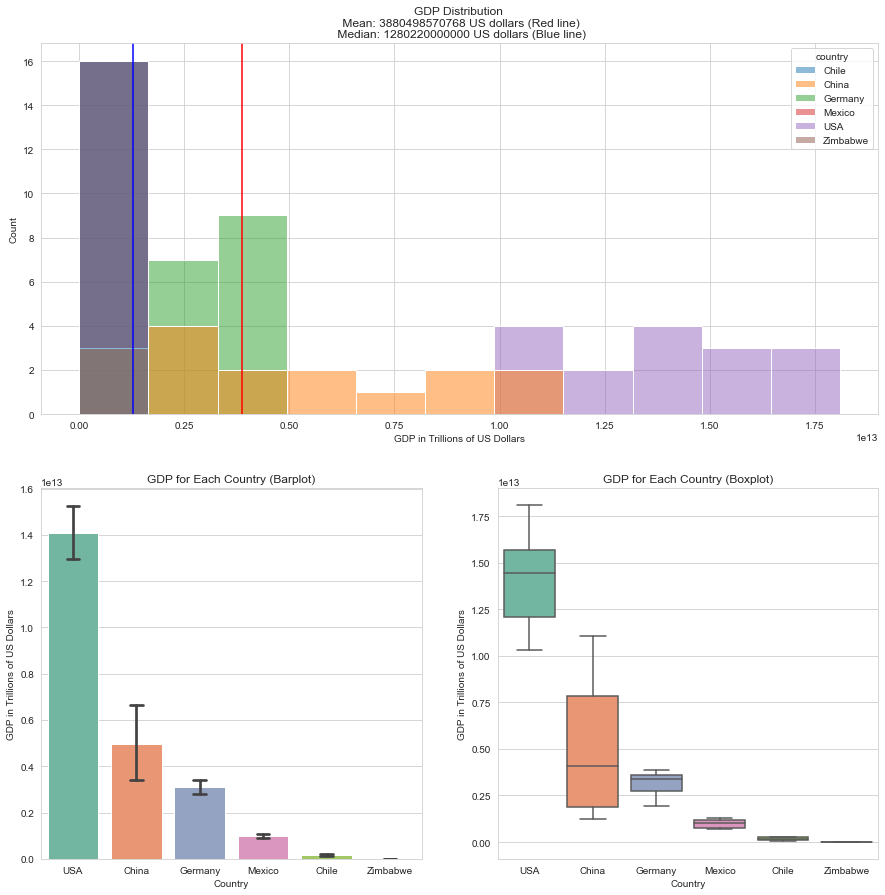

country
USA         1.407500e+13
China       4.957714e+12
Germany     3.094776e+12
Mexico      9.766506e+11
Chile       1.697888e+11
Zimbabwe    9.062580e+09
Name: gdp, dtype: float64

<Figure size 432x288 with 0 Axes>

In [6]:
plt.figure(figsize=(15, 15))
sns.set_style('whitegrid')

# Histogram
ax1 = plt.subplot(2, 1, 1)
sns.histplot(data = df, x = 'gdp', hue = 'country')
mean = round(df.gdp.mean())
median = round(df.gdp.median())
plt.axvline(mean, color='red')
plt.axvline(median, color='blue')
plt.xlabel('GDP in Trillions of US Dollars')
plt.title(f'GDP Distribution \n Mean: {mean} US dollars (Red line)\n Median: {median} US dollars (Blue line)')

# Sort GDP column in descending order 
ordered_gdp = df.sort_values(['gdp'], ascending = False)

# Barplot
ax2 = plt.subplot(2, 2, 3)
sns.barplot(data = ordered_gdp, y = 'gdp', x = 'country' , capsize = 0.2, palette = 'Set2')
plt.title('GDP for Each Country (Barplot)')
plt.xlabel('Country')
plt.ylabel('GDP in Trillions of US Dollars')

# Boxplot
ax3 = plt.subplot(2, 2, 4)
sns.boxplot(data = ordered_gdp,  y= 'gdp', x = 'country', palette = 'Set2')
plt.title('GDP for Each Country (Boxplot)')
plt.xlabel('Country')
plt.ylabel('GDP in Trillions of US Dollars')

plt.show()
plt.clf()

mean_gdp = df.groupby('country').gdp.mean().sort_values(ascending = False)
mean_gdp

### B-2 Has GDP increased over time in the six nations?

By plotting the columns of `GDP (gdp)` v.s. `Year(year)` with `line plot`, we can see the trend of the GDP from 2000 to 2015 both in `China` and `USA` has `a significant growth`. The rest of the countries didn't see increases in this magnitude.

However, if we break out the graph by country, it's much clearer to see each country's shape without the same scale on y axis. In the plot below, except China had a steady growth in this time span,  other countries all experienced different degree of dip in around 2008. Whether it was related to `the worldwide financial crisis from 2007 to 2008` needs to be looked into further. Another fact is that there was another obvious dip in Chile, Mexico and Germany around 2014.

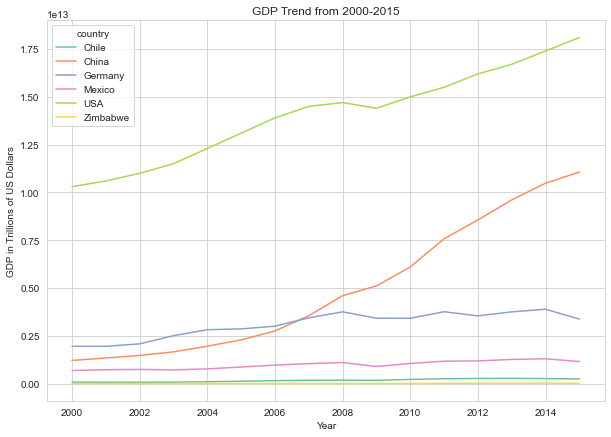

<Figure size 432x288 with 0 Axes>

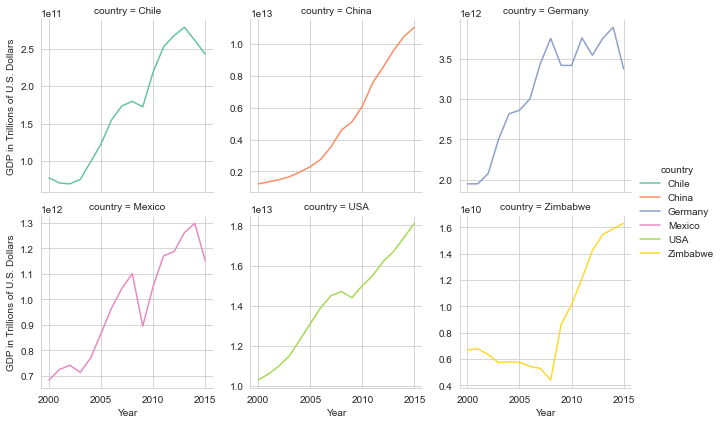

In [34]:
plt.figure(figsize=(10,7))
sns.set_style('whitegrid')

sns.lineplot(data = df, x = 'year', y = 'gdp', hue = 'country', palette = 'Set2')
plt.title('GDP Trend from 2000-2015')
plt.xlabel('Year')
plt.ylabel('GDP in Trillions of US Dollars')
plt.show()
plt.clf()


graphGDP = sns.FacetGrid(df, col="country", col_wrap=3,
                         sharey = False,
                         hue = 'country', palette = 'Set2')

graphGDP = (graphGDP.map(sns.lineplot, "year", "gdp")
            .add_legend()
            .set_axis_labels("Year", "GDP in Trillions of U.S. Dollars"))

graphGDP

### C. Is there a correlation between GDP and life expectancy of a country?

By plotting the columns of `GDP (gdp)` v.s. `Life Expectancy at Birth (life_expt)` with `scatter plot`, we can explore the relationship between two variables. In the graph(upper plot), it seems like there was no growth of GDP in Zimbabwe while the life expectancy had changes. Other countries all shows a positive correlation, which indicates that `if there is a higher GDP, then the life expectancy would also tends to be higher`.

However, if according to the plot before, we know that there was actual growth of GDP in Zimbabwe. Thus, if we break out the graph by country, instead of sharing X and Y axis, we can see clearly for the correlation for EACH COUNTRY in the lower figure. All in all, it's much surer that the `POSITIVE correlation` between GDP and life expectancy for each country. 

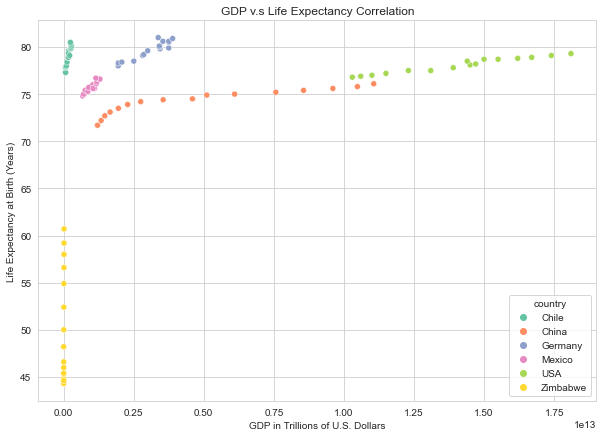

<Figure size 432x288 with 0 Axes>

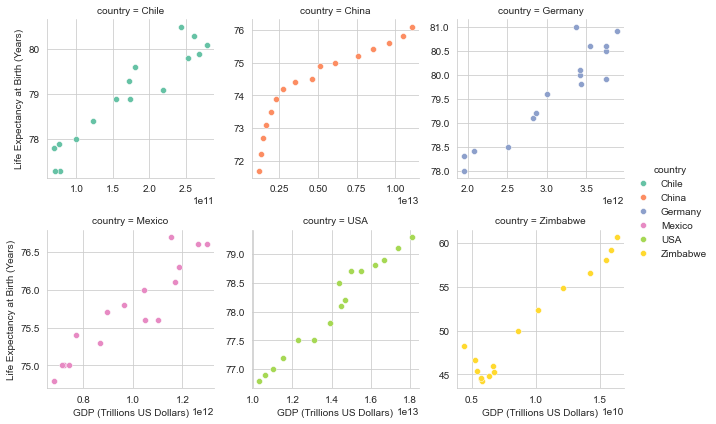

In [14]:
plt.figure(figsize=(10,7))
sns.set_style('whitegrid')

sns.scatterplot(data = df, x = 'gdp', y = 'life_expt', hue = 'country', palette = 'Set2')
plt.title('GDP v.s Life Expectancy Correlation')
plt.xlabel('GDP in Trillions of U.S. Dollars')
plt.ylabel('Life Expectancy at Birth (Years)')
plt.show()
plt.clf()

graph_GDP_life = sns.FacetGrid(df, col="country", col_wrap=3,
                               sharey = False, sharex= False,
                               hue = 'country', palette = 'Set2')

graph_GDP_life = (graph_GDP_life.map(sns.scatterplot, 'gdp', 'life_expt')
                  .add_legend()
                  .set_axis_labels('GDP (Trillions US Dollars)', 'Life Expectancy at Birth (Years)'))

graph_GDP_life

### Conclusions

**Life Expectancy at Birth**

- What is the distribution of that life expectancy?
     -  The distribution of the life expectancy is `left skewed`. And the overall mean life expectancy `72.79` years old is slightly lower than the median which is `76.75` years old. 


- What is the average life expectancy in these nations?
     - Most of the countries have the average life expectancy from `74 to 80` years old. However, the average life expectancy for Zimbabwe is only around `50` years old.


- Has life expectancy increased over time in the six nations?
     - Yes, the life expectancy in the six nations were all `increasing`, especially for `Zimbabwe`, which had a higher growing rate. However, Chile and Mexico both experienced an obvious dip around year 2008.

**GDP**

- What is the distribution of the GDP?
     - The distribution of the GDP is `right skewed`. And the overall mean GDP 3,880,498,570,768 US dollars is `three times more` than the median, which is 1,280,220,000,000 US dollars.


- What is the average GDP in these nations?
     - Comparing to the Life Expectancy graph, `the average GDP in these nations varies more`, especially for `USA`, which had a much higher GDP.


- Has GDP increased over time in the six nations?
     - Yes, the GDP has all `increased` in the six nations, especially for `China`, which had a higher growing rate. However, except China had a steady growth in this time span, other countries all experienced different degree of dip in around 2008.


**Correlation**

- Is there a correlation between GDP and life expectancy of a country?
     - Yes, there is a `POSITIVE correlation` between GDP and life expectancy for each country, which indicates that if there is a higher GDP, then the life expectancy would also tends to be higher.

## Other Thoughts and Possible Further Research

1. Does GDP really reflects on the life expectancy in a country?
- Even though looking at the correlation for GDP and the life expectancy for individual country, the result is as what I've expected that when GDP is higher then the life expectancy would also be higher. However, it's interesting that even though the USA has the highest GDP overall, the life expectancy of the USA is not the highest. On the contrary, Chilie had the second lowest GDP, while it got the second highest life expectancy from 6 countries. So, I think it's possible that GDP can affects a country's life expectancy. But, it's NOT the only factor.

2. What happened in 2008?
- As the graph of GDP showing that many countries except China had different degree of dip in around 2008. Besides, in the graph of the life expectancy, Chile and Mexico also experienced an obvious dip around 2008. As a well-known event that the world went through a financial crisis at that time. But, how exactly did it influence each country's GDP and even the life expectancy? This will be an interesing direction for further research.